In [6]:
import pandas as pd
df = pd.read_csv('winequality-red.csv')

In [7]:
quality_mapping = { 
    3: 0, 
    4: 1, 
    5: 2, 
    6: 3, 
    7: 4, 
    8: 5 
} 

df.loc[:, "quality"] = df.quality.map(quality_mapping) 

In [8]:
df = df.sample(frac=1).reset_index(drop=True)
df_train = df[:1000]
df_test = df[1000:]

In [11]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth=3)

cols = ['fixed acidity',  
        'volatile acidity',  
        'citric acid',
        'residual sugar', 
        'chlorides', 
        'free sulfur dioxide', 
        'total sulfur dioxide', 
        'density', 
        'pH', 
        'sulphates', 
        'alcohol'] 

clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [14]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])
train_accruacy = metrics.accuracy_score(df_train.quality, train_predictions)
test_accuracy = metrics.accuracy_score( df_test.quality, test_predictions )

print(test_accuracy)

0.5509181969949917


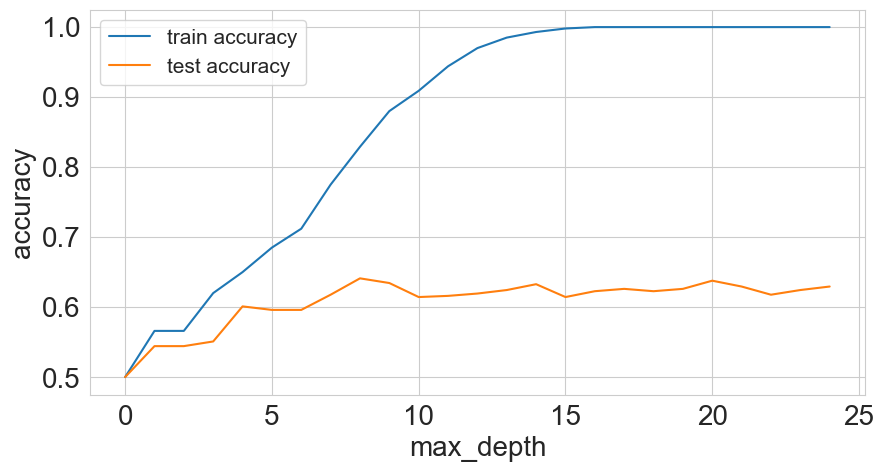

In [ ]:
from sklearn import tree 
from sklearn import metrics 
 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns 

matplotlib.rc('xtick', labelsize=20)  
matplotlib.rc('ytick', labelsize=20)  
%matplotlib inline   

train_accuracies = [0.5] 
test_accuracies = [0.5] 

for depth in range(1, 25): 
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    cols = [ 
        'fixed acidity',  
        'volatile acidity', 
        'citric acid',  
        'residual sugar', 
        'chlorides', 
        'free sulfur dioxide',  
        'total sulfur dioxide', 
        'density', 
        'pH',  
        'sulphates', 
        'alcohol' 
        ] 
 
    clf.fit(df_train[cols], df_train.quality) 
 
    train_predictions = clf.predict(df_train[cols]) 
    test_predictions = clf.predict(df_test[cols]) 
 
    train_accuracy = metrics.accuracy_score( 
        df_train.quality, train_predictions 
    ) 
    test_accuracy = metrics.accuracy_score( 
        df_test.quality, test_predictions 
    ) 
    train_accuracies.append(train_accuracy) 
    test_accuracies.append(test_accuracy)   
 
plt.figure(figsize=(10, 5)) 
sns.set_style("whitegrid") 
plt.plot(train_accuracies, label="train accuracy") 
plt.plot(test_accuracies, label="test accuracy") 
plt.legend(loc="upper left", prop={'size': 15}) 
plt.xticks(range(0, 26, 5)) 
plt.xlabel("max_depth", size=20) 
plt.ylabel("accuracy", size=20) 
plt.show() 